### Goal:

Building a model to predict whether a customer would be interested in Vehicle Insurance

### Data columns definitions

## Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

## Data Collection

In [2]:
data = pd.read_csv('train.csv')
data.head()

id  Gender  Age  Driving_License  Region_Code  Previously_Insured  \
0   1    Male   44                1         28.0                   0   
1   2    Male   76                1          3.0                   0   
2   3    Male   47                1         28.0                   0   
3   4    Male   21                1         11.0                   1   
4   5  Female   29                1         41.0                   1   

  Vehicle_Age Vehicle_Damage  Annual_Premium  Policy_Sales_Channel  Vintage  \
0   > 2 Years            Yes         40454.0                  26.0      217   
1    1-2 Year             No         33536.0                  26.0      183   
2   > 2 Years            Yes         38294.0                  26.0       27   
3    < 1 Year             No         28619.0                 152.0      203   
4    < 1 Year             No         27496.0                 152.0       39   

   Response  
0         1  
1         0  
2         1  
3         0  
4         0

In [3]:
test_data = pd.read_csv('test.csv')
test_data.head()

id Gender  Age  Driving_License  Region_Code  Previously_Insured  \
0  381110   Male   25                1         11.0                   1   
1  381111   Male   40                1         28.0                   0   
2  381112   Male   47                1         28.0                   0   
3  381113   Male   24                1         27.0                   1   
4  381114   Male   27                1         28.0                   1   

  Vehicle_Age Vehicle_Damage  Annual_Premium  Policy_Sales_Channel  Vintage  
0    < 1 Year             No         35786.0                 152.0       53  
1    1-2 Year            Yes         33762.0                   7.0      111  
2    1-2 Year            Yes         40050.0                 124.0      199  
3    < 1 Year            Yes         37356.0                 152.0      187  
4    < 1 Year             No         59097.0                 152.0      297

## Data Description

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [5]:
data.describe()

id            Age  Driving_License    Region_Code  \
count  381109.000000  381109.000000    381109.000000  381109.000000   
mean   190555.000000      38.822584         0.997869      26.388807   
std    110016.836208      15.511611         0.046110      13.229888   
min         1.000000      20.000000         0.000000       0.000000   
25%     95278.000000      25.000000         1.000000      15.000000   
50%    190555.000000      36.000000         1.000000      28.000000   
75%    285832.000000      49.000000         1.000000      35.000000   
max    381109.000000      85.000000         1.000000      52.000000   

       Previously_Insured  Annual_Premium  Policy_Sales_Channel  \
count       381109.000000   381109.000000         381109.000000   
mean             0.458210    30564.389581            112.034295   
std              0.498251    17213.155057             54.203995   
min              0.000000     2630.000000              1.000000   
25%              0.000000    24405.000000             29.000000   
50%              0.000000    31669.000000            133.000000   
75%              1.000000    39400.000000            152.000000   
max              1.000000   540165.000000            163.000000   

             Vintage       Response  
count  381109.000000  381109.000000  
mean      154.347397       0.122563  
std        83.671304       0.327936  
min        10.000000       0.000000  
25%        82.000000       0.000000  
50%       154.000000       0.000000  
75%       227.000000       0.000000  
max       299.000000       1.000000

In [6]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127037 entries, 0 to 127036
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    127037 non-null  int64  
 1   Gender                127037 non-null  object 
 2   Age                   127037 non-null  int64  
 3   Driving_License       127037 non-null  int64  
 4   Region_Code           127037 non-null  float64
 5   Previously_Insured    127037 non-null  int64  
 6   Vehicle_Age           127037 non-null  object 
 7   Vehicle_Damage        127037 non-null  object 
 8   Annual_Premium        127037 non-null  float64
 9   Policy_Sales_Channel  127037 non-null  float64
 10  Vintage               127037 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 10.7+ MB


In [7]:
test_data.describe()

id            Age  Driving_License    Region_Code  \
count  127037.000000  127037.000000    127037.000000  127037.000000   
mean   444628.000000      38.765903         0.998134      26.459866   
std     36672.567411      15.465814         0.043152      13.209916   
min    381110.000000      20.000000         0.000000       0.000000   
25%    412869.000000      25.000000         1.000000      15.000000   
50%    444628.000000      36.000000         1.000000      28.000000   
75%    476387.000000      49.000000         1.000000      35.000000   
max    508146.000000      85.000000         1.000000      52.000000   

       Previously_Insured  Annual_Premium  Policy_Sales_Channel        Vintage  
count       127037.000000   127037.000000         127037.000000  127037.000000  
mean             0.460039    30524.643576            111.800468     154.318301  
std              0.498403    16945.297103             54.371765      83.661588  
min              0.000000     2630.000000              1.000000      10.000000  
25%              0.000000    24325.000000             26.000000      82.000000  
50%              0.000000    31642.000000            135.000000     154.000000  
75%              1.000000    39408.000000            152.000000     227.000000  
max              1.000000   472042.000000            163.000000     299.000000

In [8]:
#Creating copies of datassets

train = data.copy()
test = test_data.copy()

##      

## Exploratory Data Analysis(EDA)

In [9]:
#Calculating positive and negative samples in percentages

positive_percent = len(train[train['Response'] == 1])/len(data)*100 
negative_percent = len(train[train['Response'] == 0])/len(data)*100
percentages = [positive_percent,negative_percent]

# Creating a pie chart
plt.figure(figsize = (6,8))
plt.pie(percentages, labels=['Interested','Not Interested'], autopct = '%.1f%%', colors = ['#aecc35', 'cyan'])
plt.title('Positive and negative samples (Percentages)', fontsize = 18)
plt.show()

#### This is a highly imbalanced dataset. 

/home/fatemeh/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


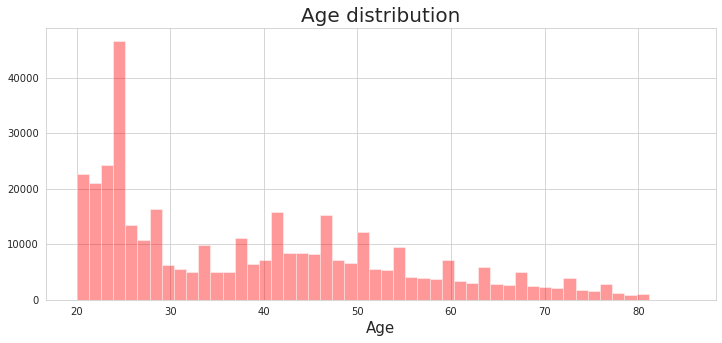

In [10]:
plt.figure(figsize = (12,5))
sns.distplot(train['Age'], kde = False, color = 'Red')
plt.xlabel('Age', fontsize = 15)
plt.title('Age distribution', fontsize = 20)
plt.show()

#### males or females analyses

In [11]:
plt.figure(figsize = (10,6) )
sns.countplot(data = train, x = 'Gender', hue = 'Response', palette = 'nipy_spectral')
plt.xlabel('Gender', fontsize = 14)
plt.ylabel('Count', fontsize = 14)
plt.title('Gender count according to Response', fontsize = 18)
plt.show()

#### How many customers have a driving license?

In [12]:
train['Driving_License'].value_counts()

1    380297
0       812
Name: Driving_License, dtype: int64

In [13]:
plt.figure(figsize = (10,5) )
sns.countplot(train['Driving_License'])
plt.xlabel('Driving License', fontsize = 12)
plt.show()

/home/fatemeh/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


 Analyzing the responses of customers towards new vehicle insurance

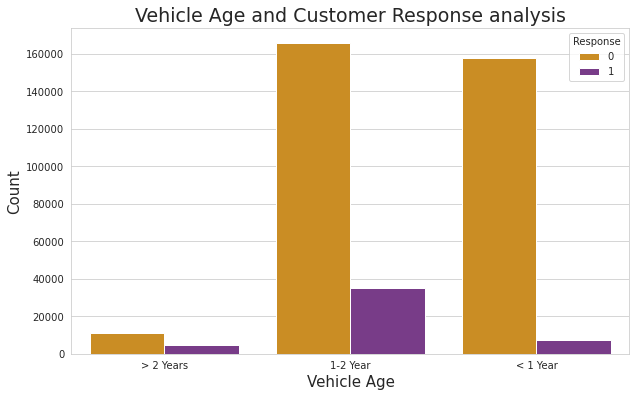

In [14]:
plt.figure(figsize = (10,6) )
sns.countplot(data = train, x = 'Vehicle_Age', hue = 'Response', palette='CMRmap_r')
plt.xlabel('Vehicle Age', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.title('Vehicle Age and Customer Response analysis', fontsize = 19)
plt.show()

Illustration of the fact that customers that have vehicles between 1 and 2 years have shown interest in getting vehicle insurance.

to make sure we should check if the vehicles that are between 1 and 2 years got damaged or not.

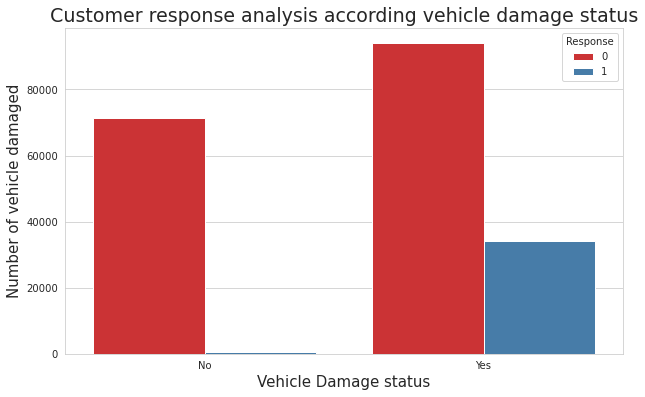

In [15]:
vehicles = train[train['Vehicle_Age'] == '1-2 Year']

plt.figure(figsize = (10,6) )
sns.countplot(data = vehicles, x = 'Vehicle_Damage', hue = 'Response', palette='Set1')
plt.xlabel('Vehicle Damage status', fontsize = 15)
plt.ylabel('Number of vehicle damaged', fontsize = 15)
plt.title('Customer response analysis according vehicle damage status', fontsize = 19)
plt.show()

#### Annual Premium distributiom

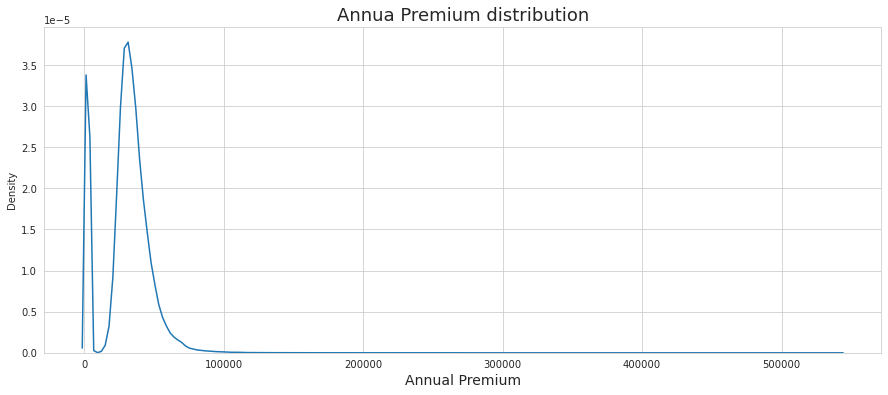

In [16]:
plt.figure(figsize=(15,6))
sns.kdeplot(data['Annual_Premium'])
plt.xlabel('Annual Premium', fontsize = 14)
plt.title('Annua Premium distribution', fontsize = 18)
plt.show()

#### Policy Sales distribution

In [17]:
plt.figure(figsize = (12,5))
sns.distplot(train['Policy_Sales_Channel'], kde = False, color = 'orange')
plt.xlabel('Policy Sales Chanel', fontsize = 15)
plt.title('Policy Sales distribution', fontsize = 20)
plt.show()

/home/fatemeh/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


#### Region Code distribution

##### The region code can also be clustered in three different categories.

#### Important: if customers who previously had insurance would take another vehicle insurance.

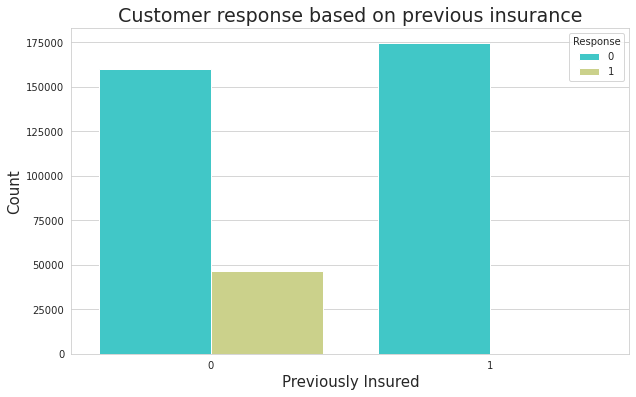

In [18]:
plt.figure(figsize = (10,6) )
sns.countplot(data = train, x = 'Previously_Insured', hue = 'Response', palette='rainbow')
plt.xlabel('Previously Insured', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.title('Customer response based on previous insurance', fontsize = 19)
plt.show()

important: customers who already have an insurance won't take another insurance. 

#### **Correlation heatmap**

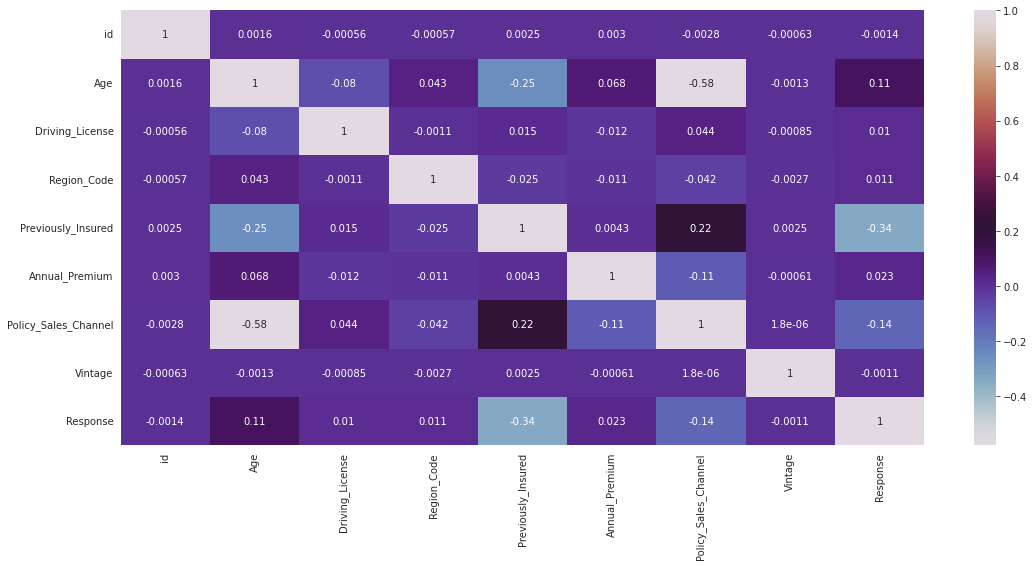

In [19]:
plt.figure(figsize = (18,8))
sns.heatmap(train.corr(), cmap = 'twilight', annot = True)
plt.show()

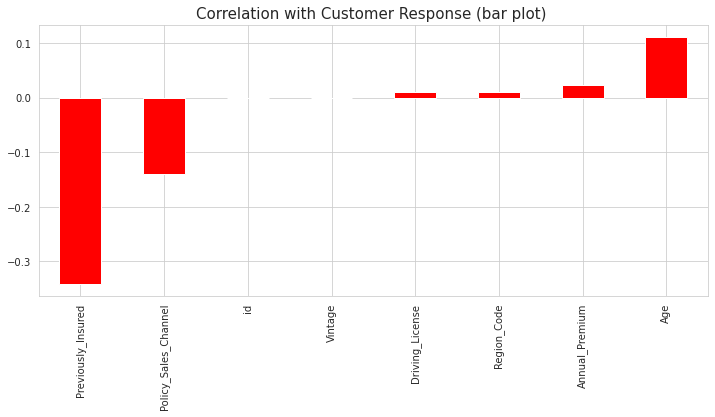

In [20]:
plt.figure(figsize=(12,5))
train.corrwith(train['Response']).sort_values().drop('Response').plot(kind='bar', color = 'red')
plt.title('Correlation with Customer Response (bar plot) ', fontsize= 15)
plt.show()

Vintage column has almost no correlation with Customer Response. That means a customer who is connected to the company for a long time does'nt necessarily mean that he/she will take the vehicle insurance.